In [1]:
import os
from places_recommender.config import PROCESSED_DATA_DIR
import random
import numpy as np
import pandas as pd

[Great repo](https://github.com/ans12256-PROJECTS/C3_PROJECT/blob/45a3ad230c1e0b43b0dc3d62d872b3e5079a7b4d/src/json_convert.py)

* https://github.com/aneekdas96/GoogleLocal/blob/977656456731a2b4d312c1a452b0fbfa44915be7/load_and_preprocess_data/load_and_preprocess_review_data.py
* https://github.com/Huang-W/google-local-reviews/tree/d183d191e4a2677b1204252d844093f8a6b4151b
* https://github.com/darbyShaw/GoogleLocal/tree/e773c6401ec1e4c5cdc202d60e31a81a28be23e6
* https://github.com/ans12256-PROJECTS/C3_PROJECT/blob/88263e29a970c9ac3a845867f6e068b317ef3ee0/src/json_convert.py
* https://github.com/ddav118/CSE-158-CA-Google-Local-Predictions/tree/887d9ed12913e1617ca1ac4b503bdc6d427ddfaa
* https://github.com/akshayreddykotha/rating-prediction-google-local/blob/862b97dca2ac29b97156288429f7d3632b76c9fe/exploration.ipynb

In [2]:
os.listdir(PROCESSED_DATA_DIR)

['users_data.pkl', 'places.pkl', 'reviews.pkl']

In [3]:
%%time
# users.json 764.2 Mb
# places.json 1.07 Gb
# reviews.json 4.57 Gb
df = pd.read_pickle(PROCESSED_DATA_DIR / 'places.pkl')  # Wall time: 1min 14s, Memory: 9.5 GB
# df.shape # (3,114,353, 8)
# df.columns ['name', 'price', 'address', 'hours', 'phone', 'closed', 'gPlusPlaceId', 'gps']
# df.gps[0] [33.703804, -117.003209]
# in the Southern hemisphere (negative latitudes)
# df.gps[0][0] # 33.703804 latitude North-South
# Positive longitudes are east of the prime meridian, and negative ones are west
# df.gps[0][1] # -117.003209 longitude East-West
# df.address[0] # ['2615 Angler Ave', 'Hemet, CA 92545'] Checks out in google maps

CPU times: user 13.1 s, sys: 4.75 s, total: 17.9 s
Wall time: 20.3 s


In [6]:
# df.gps.dropna().shape # df.gps.shape (3114353,) #df.gps.dropna().shape (3087402,), 26951 no gps data
gps = pd.DataFrame(df.gps.dropna().to_list(), columns = ['NS_latitudes','EW_longitudes']) #.str.split(',', expand=True)
gps.head()

,NS_latitudes,EW_longitudes
0,33.703804,-117.003209
1,38.979759,-76.547538
2,43.227760,44.762726
3,43.529494,-96.792244
4,-2.976256,104.742662


In [7]:
whos


Variable             Type         Data/Info
-------------------------------------------
PROCESSED_DATA_DIR   PosixPath    /Users/jobandtalent/perso<...>ecommender/data/processed
df                   DataFrame                             <...>3114353 rows x 8 columns]
gps                  DataFrame             NS_latitudes  EW<...>3087402 rows x 2 columns]
json                 module       <module 'json' from '/Use<...>hon3.9/json/__init__.py'>
np                   module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os                   module       <module 'os' from '/Users<...>9.4/lib/python3.9/os.py'>
pd                   module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
random               module       <module 'random' from '/U<...>lib/python3.9/random.py'>
sys                  module       <module 'sys' (built-in)>


In [9]:
# https://github.com/chrisshaffer/fraud-detection-case-study/blob/main/src/Map_Plots.ipynb
# GPS plots
import matplotlib.pyplot as plt
import geopandas as gpd  # no geopandas in base environment
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
font_size = 20
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=font_size) #fontsize of the legend

In [11]:
gps.shape


(3087402, 2)

In [12]:
# Combined filter can only be true if both coordinates are correct
ser1 = pd.Series([True,True,False,False])
ser2 = pd.Series([True,False,True,False])
ser1 & ser2

0     True
1    False
2    False
3    False
dtype: bool

True     3011584
False      75818
dtype: int64

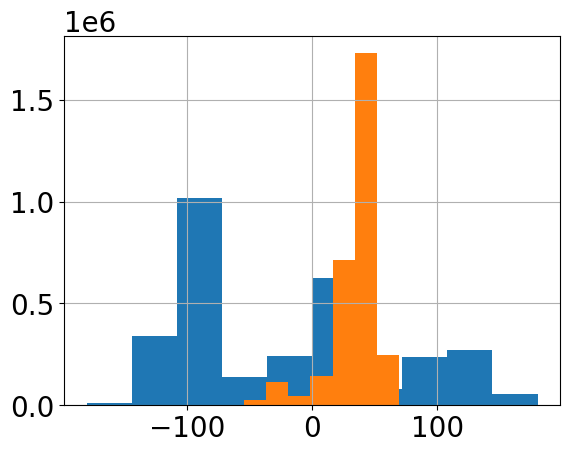

In [13]:
EW_filter=abs(gps.EW_longitudes) <= 180
# > 180 False    3012033, True       75369
# <= True     3012033, False      75369 (2.44%) 75369/3087402*100
gps.EW_longitudes[EW_filter].hist()
EW_filter.value_counts()  # ~ -3087403
# EW_filter

NS_filter=abs(gps.NS_latitudes) <= 90
# <= True     3011647, False      75755 (2.45%) 75755/3087402*100
gps.NS_latitudes[NS_filter].hist()
NS_filter.value_counts()  # ~ -3087403
# NS_filter

gps_value_filter = EW_filter & NS_filter # only True True pairs result in True
# True     3011584, False      75818 (2.45%) 75818/3087402*100
gps_value_filter.value_counts()

In [14]:
max(gps.EW_longitudes), min(gps.EW_longitudes)


(178054936.0, -159601736.0)

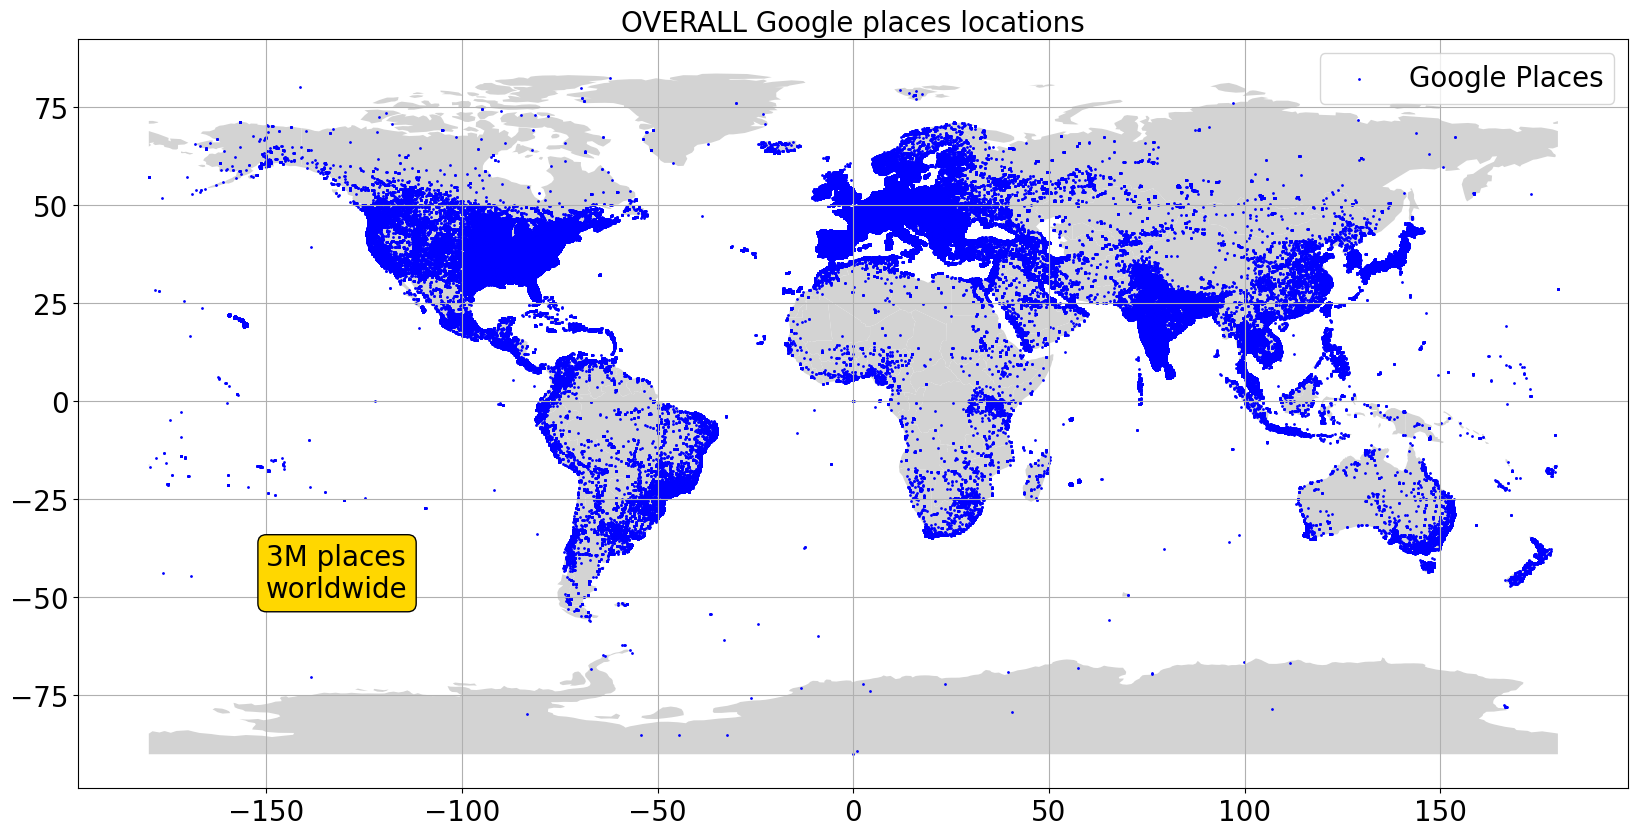

In [16]:
countries.plot(color="lightgrey", figsize=(20,15)) # color="lightgrey"
plt.scatter(gps.EW_longitudes[gps_value_filter],
            gps.NS_latitudes[gps_value_filter], s=1,
            color='b', label='Google Places')

plt.title('OVERALL Google places locations')
box = {'facecolor': 'gold',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(-150, -50, '3M places\nworldwide', bbox=box)
plt.legend()
plt.grid()
plt.savefig('Places_TOTAL.png', facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')